# Feature Exploration

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import KernelPCA
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

## Read Dataset

In [207]:
data = pd.read_excel("../Data/Matrix_Apr10.xlsx", sheetname='train')
test = pd.read_excel("../Data/Matrix_Apr10.xlsx", sheetname='test')

Add output column "growth"

In [430]:
#3 categories
# data['growth'] = np.where(data['Y'] <= np.mean(data.Y) - np.std(data.Y), "NEGATIVE", np.where(data['Y'] >= np.mean(data.Y) + np.std(data.Y), "HIGH_GROWTH", "NORMAL_GROWTH"))
# test['growth'] = np.where(test['Y'] <= np.mean(data.Y) - np.std(data.Y), "NEGATIVE", np.where(test['Y'] >= np.mean(data.Y) + np.std(data.Y), "HIGH_GROWTH", "NORMAL_GROWTH"))

#2 categories evenly distributed
#data['growth'] = np.where(data['Y'] <= np.mean(data.Y), "BELOW AVERAGE", "ABOVE AVERAGE")
#test['growth'] = np.where(test['Y'] <= np.mean(data.Y), "BELOW AVERAGE", "ABOVE AVERAGE")

#2 categories high/not high growth
data['growth'] = np.where(data['Y'] <= np.mean(data.Y) + np.std(data.Y), "NOT HIGH GROWTH", "HIGH GROWTH")
test['growth'] = np.where(test['Y'] <= np.mean(data.Y) + np.std(data.Y), "NOT HIGH GROWTH", "HIGH GROWTH")


data.head()
test.head()

postal_code  Years    useful     funny      cool     Price  use_change  \
0        15003   2015  0.901639  0.327869  0.475410  2.076923    0.179067   
1        15003   2016  0.319444  0.083333  0.194444  2.117647   -0.645707   
2        15009   2015  0.000000  0.000000  0.000000  2.000000    0.000000   
3        15009   2016  0.000000  0.000000  0.000000  2.000000    0.000000   
4        15015   2015  0.000000  0.000000  0.000000  2.000000    0.000000   

   fun_change  coo_change  pri_change       ...          sta_std  \
0    0.857923    1.309133    0.002653       ...         1.327926   
1   -0.745833   -0.590996    0.019608       ...         1.052235   
2    0.000000    0.000000    0.000000       ...         0.000000   
3    0.000000    0.000000    0.000000       ...         0.000000   
4    0.000000    0.000000    1.000000       ...         0.000000   

   reviews_perc  prev_stars  Star_change  NumBsqft_Rev  Bsqft_change  \
0      0.001568    4.411765    -0.033880      9.384615      3.066667   
1      0.001638    4.262295     0.023184     11.076923      0.180328   
2      0.000026    5.000000    -0.800000      0.040816      0.000000   
3      0.000023    1.000000     0.000000      0.040816      0.000000   
4      0.000026    5.000000    -0.800000      1.111111      0.000000   

        t-1       t-2         Y           growth  
0  0.017544  0.000000  0.120690      HIGH GROWTH  
1  0.120690  0.017544  0.015385  NOT HIGH GROWTH  
2  0.062201  0.066327  0.045045  NOT HIGH GROWTH  
3  0.045045  0.062201  0.004310  NOT HIGH GROWTH  
4  0.051383  0.063025  0.078947      HIGH GROWTH  

[5 rows x 40 columns]

Split train and test

In [431]:
X_train = data.drop(['growth', 'Y', 'postal_code', 'Years'], axis =1)
y_train = data.growth
X_test = test.drop(['growth', 'Y', 'postal_code', 'Years'], axis =1)
y_test = test.growth

View all the columns to start exploration

In [107]:
data.columns

Index([ u'postal_code',        u'Years',       u'useful',        u'funny',
               u'cool',        u'Price',   u'use_change',   u'fun_change',
         u'coo_change',   u'pri_change',   u'use_median',   u'fun_median',
         u'coo_median',   u'pri_median',      u'use_std',      u'fun_std',
            u'coo_std',      u'pri_std',      u'stars_1',      u'stars_2',
            u'stars_3',      u'stars_4',      u'stars_5', u'Star1_change',
       u'Star2_change', u'Star3_change', u'Star4_change', u'Star5_change',
              u'stars',   u'sta_median',      u'sta_std', u'reviews_perc',
         u'prev_stars',  u'Star_change', u'NumBsqft_Rev', u'Bsqft_change',
                u't-1',          u't-2',            u'Y',       u'growth'],
      dtype='object')

## Boxplots of variables split by categories

### Percentage of reviews of each zip code per year

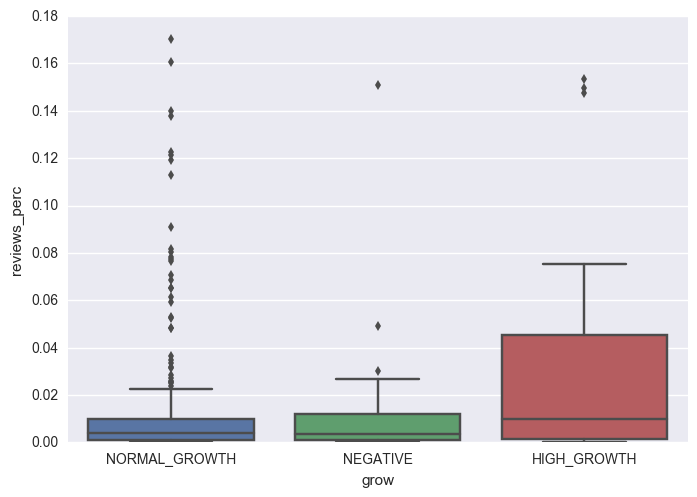

In [79]:
sns.boxplot(data=data, x= 'grow', y = 'reviews_perc')
plt.show()

### Number of businesses per sqft

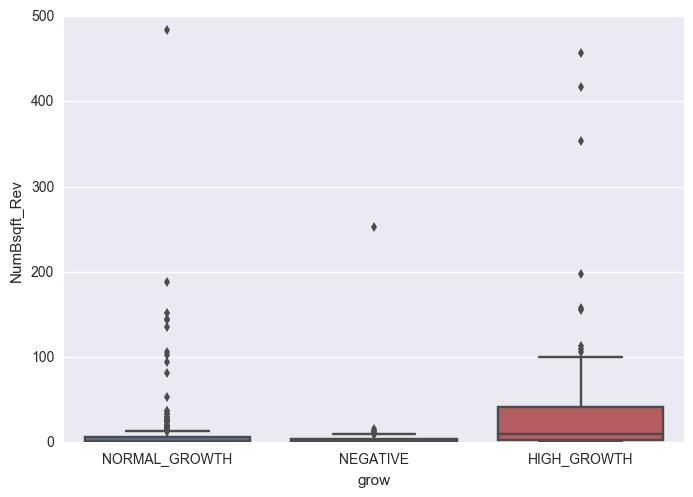

In [81]:
sns.boxplot(data=data, x= 'grow', y = 'NumBsqft_Rev')
plt.show()

### Growth of the previous period

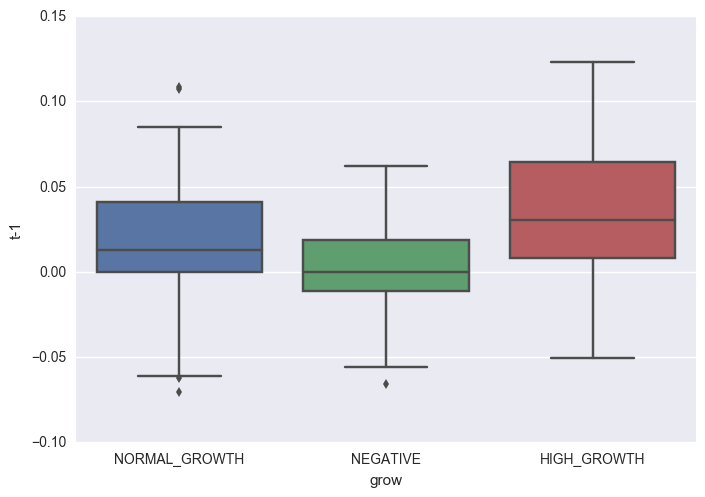

In [86]:
sns.boxplot(data=data, x= 'grow', y = 't-1')
plt.show()

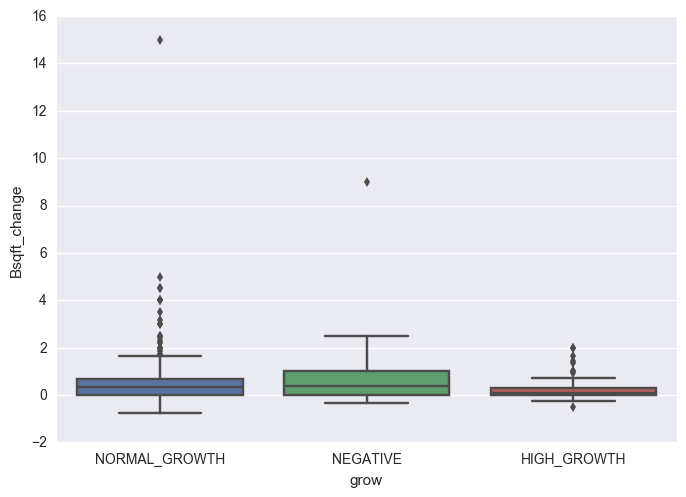

In [92]:
sns.boxplot(data=data, x= 'grow', y = 'Bsqft_change')
plt.show()

### Kernel PCA

In [432]:
X_kpca = pd.DataFrame(KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=10).fit_transform(X_train))
X_kpca['growth'] = y_train

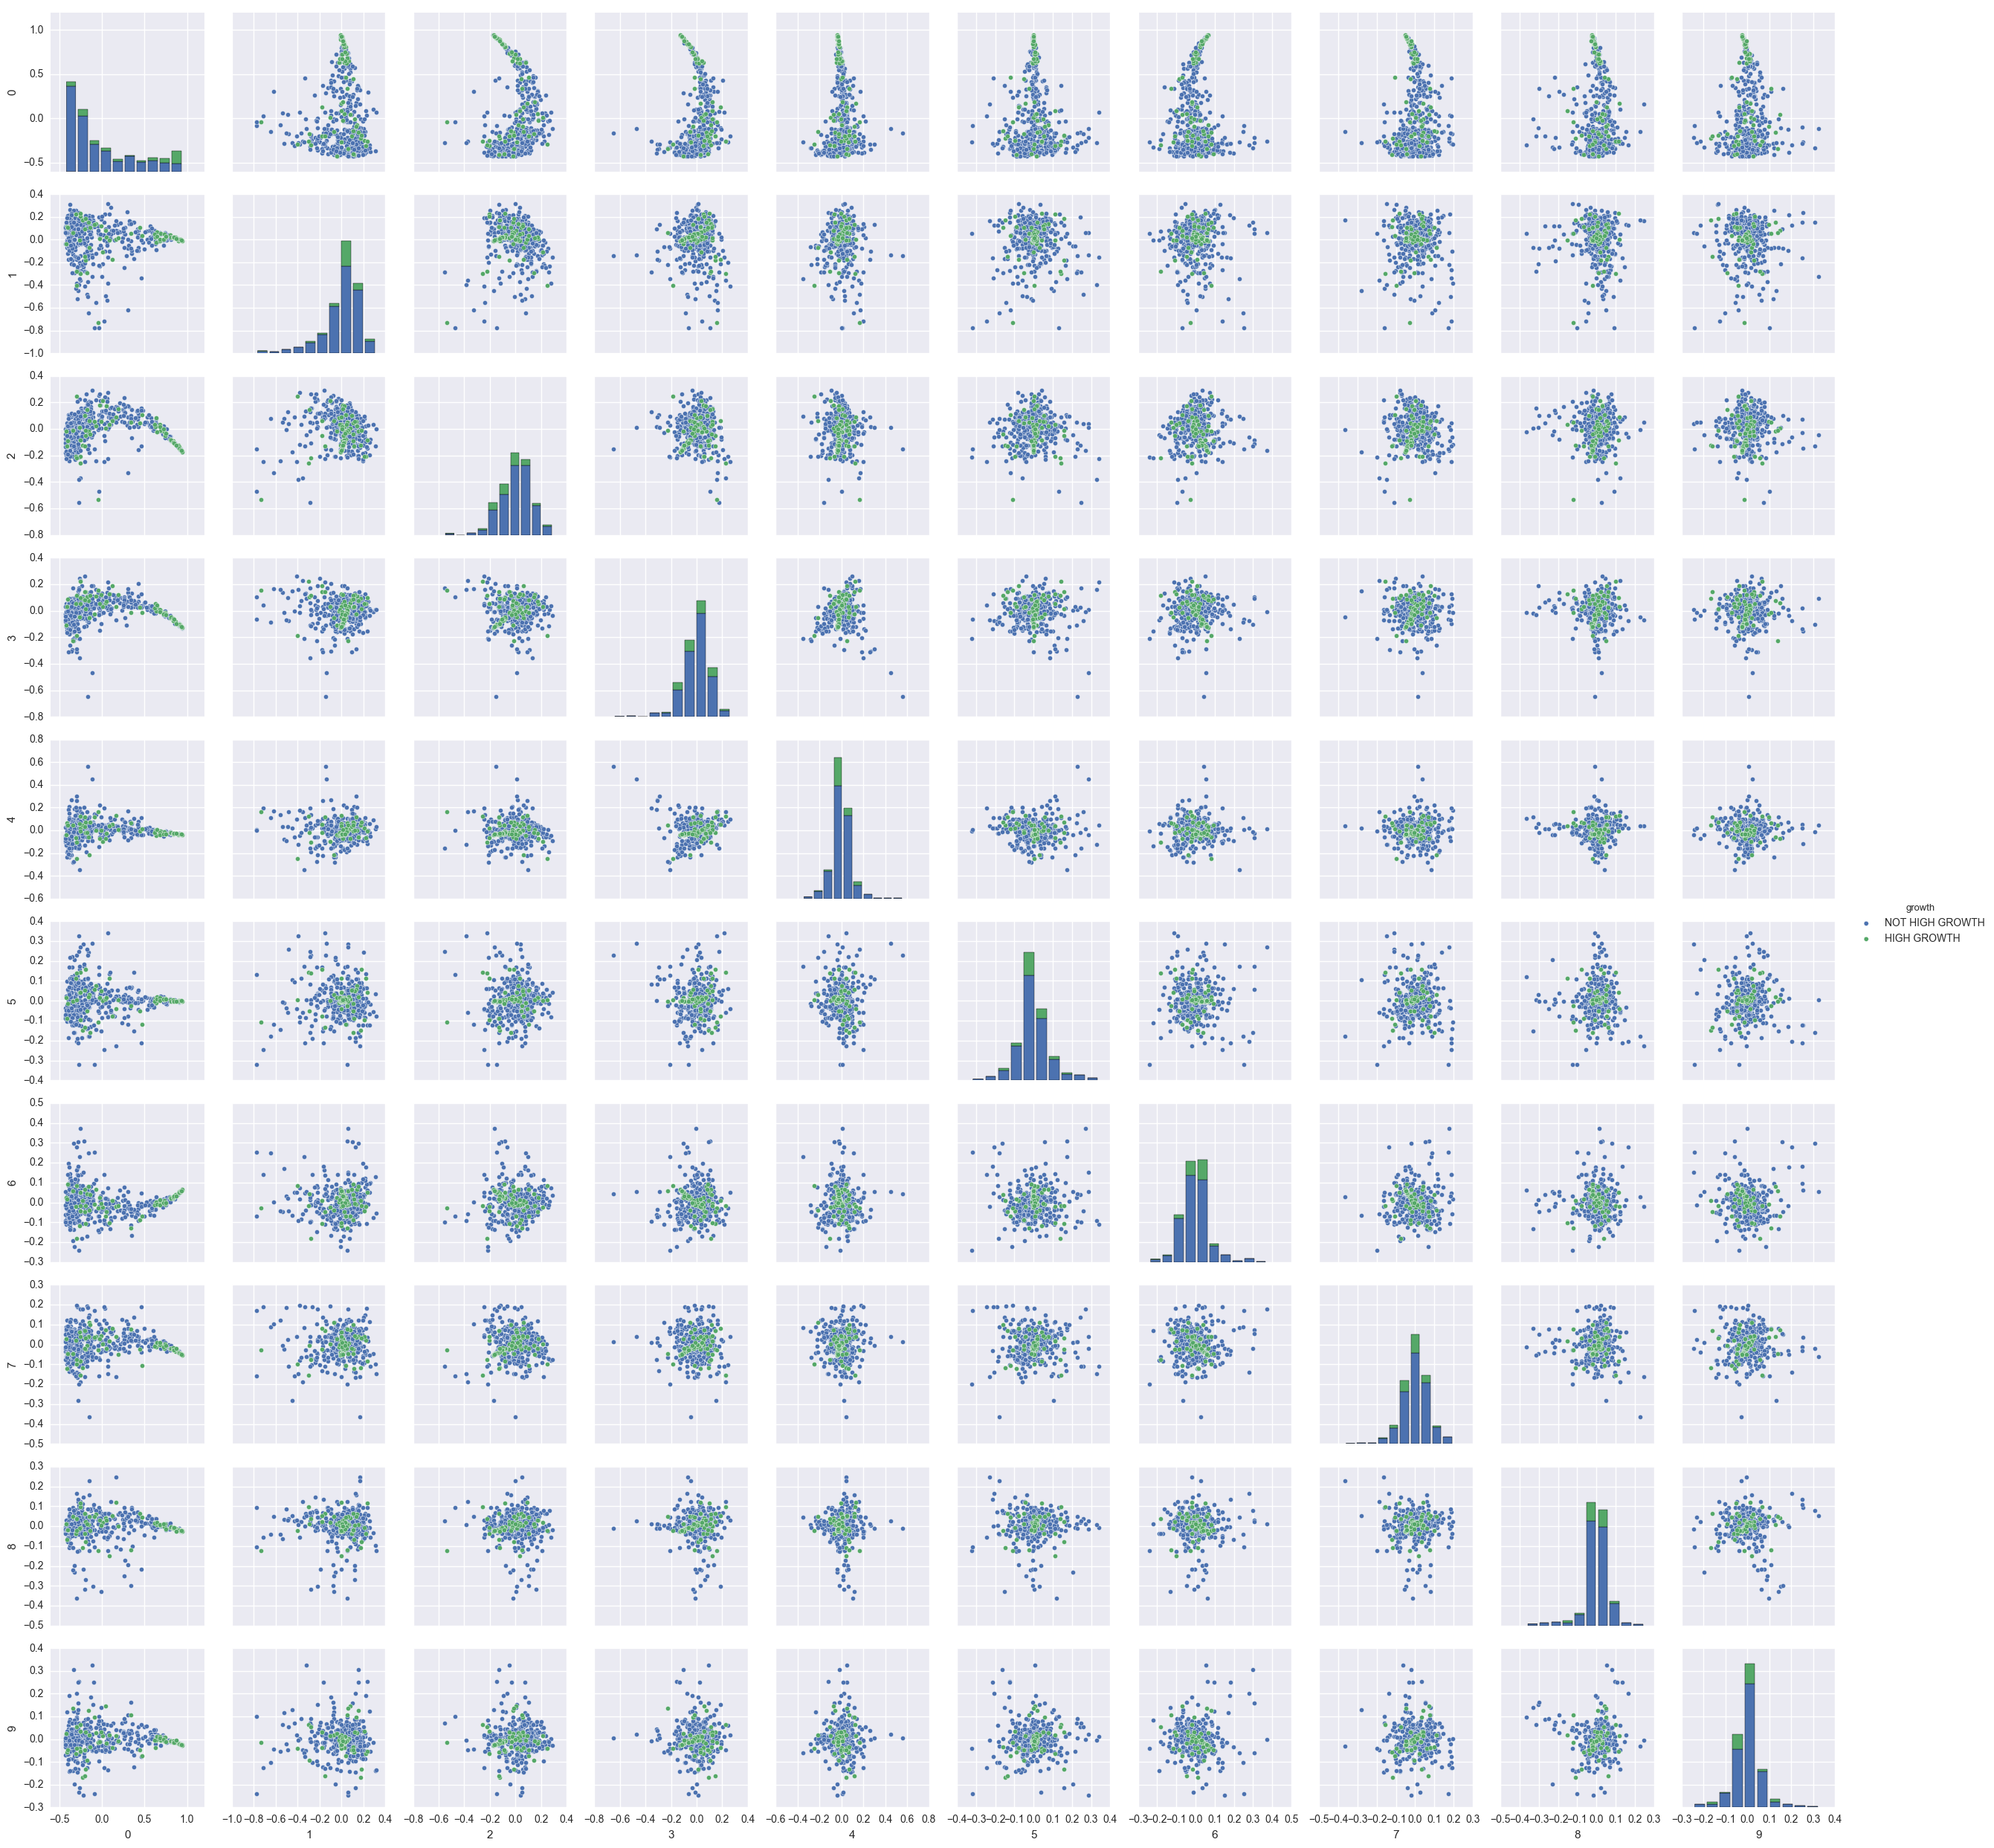

In [433]:
sns.pairplot(data=X_kpca, hue = 'growth')
plt.show()

### kNN

In [434]:
k = 3

kpca = KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=5)
X_kpca = pd.DataFrame(kpca.fit_transform(X_train))

clf = neighbors.KNeighborsClassifier(k, weights='uniform', p=3)
clf.fit(X_kpca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='uniform')

In [435]:
X_kpca_test = kpca.fit_transform(X_test)
pred = pd.DataFrame(clf.predict_proba(X_kpca_test))
pred.columns = clf.classes_
y_pred = pred.idxmax(axis=1)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    HIGH GROWTH       0.36      0.14      0.20        65
NOT HIGH GROWTH       0.62      0.85      0.72       107

    avg / total       0.52      0.58      0.52       172



### Random Forest

In [436]:
X_kpca = pd.DataFrame(kpca.fit_transform(X_train))
X_kpca_test = kpca.fit_transform(X_test)

rf = RandomForestClassifier(class_weight="balanced", max_depth=7)
rf.fit(X_kpca, y_train)
y_pred_rf = rf.predict(X_kpca_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[  0  65]
 [  0 107]]
                 precision    recall  f1-score   support

    HIGH GROWTH       0.00      0.00      0.00        65
NOT HIGH GROWTH       0.62      1.00      0.77       107

    avg / total       0.39      0.62      0.48       172



## Oversampling test

In [437]:
ros = RandomOverSampler()
x_train_os, y_train_os = ros.fit_sample(X_train, y_train)

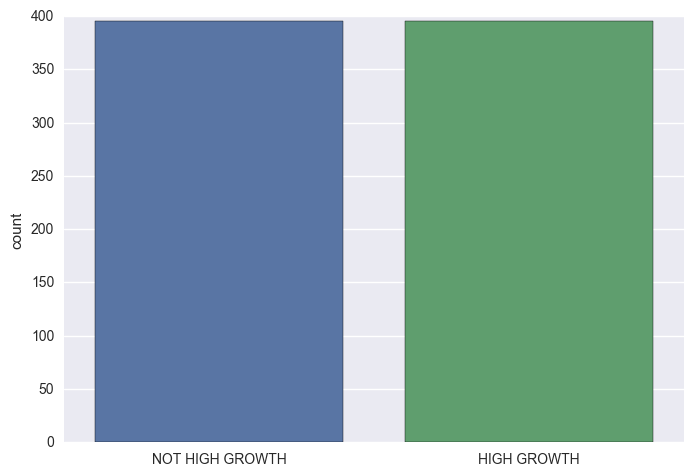

In [438]:
sns.countplot(y_train_os)
plt.show()

### Kernel PCA oversampling

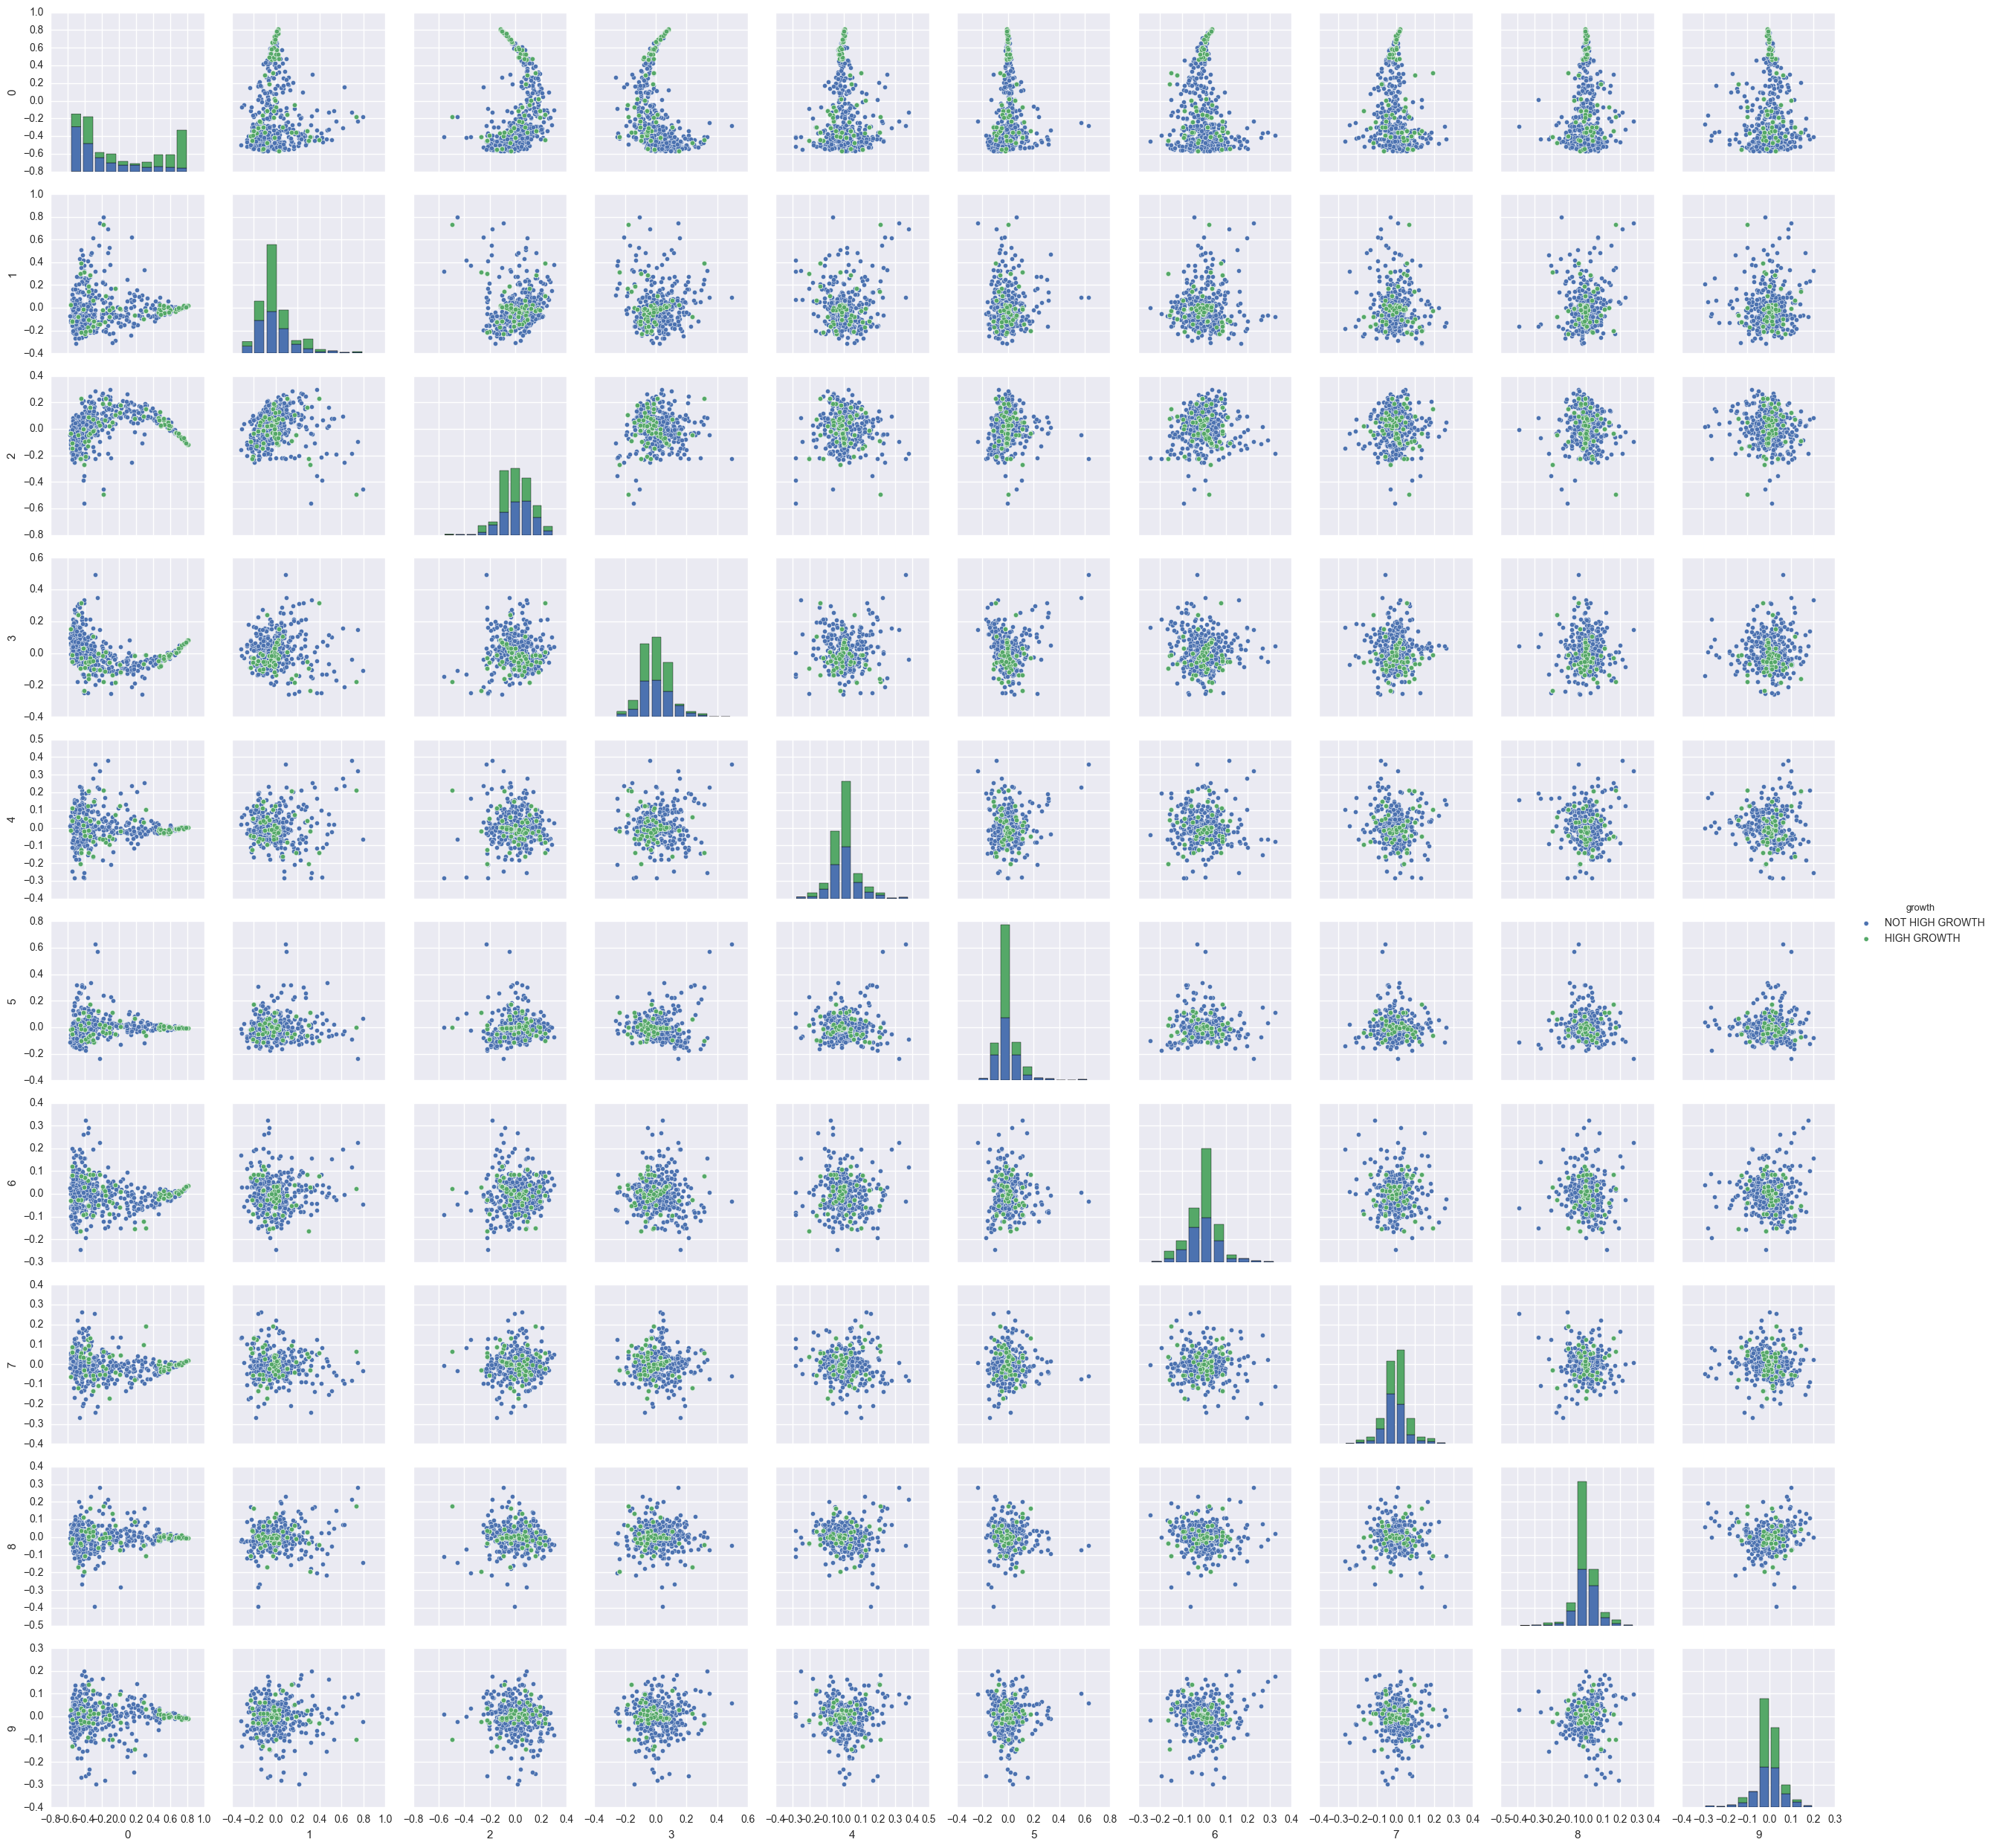

In [444]:
X_kpca_os = pd.DataFrame(KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=10, gamma = 0.1).fit_transform(x_train_os))
X_kpca_os['growth'] = y_train_os
sns.pairplot(data=X_kpca_os, hue = 'growth')
plt.show()

### Random Forest

In [445]:
kpca_os = KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=10)

X_kpca_os = pd.DataFrame(kpca_os.fit_transform(x_train_os))
X_kpca_os_test = pd.DataFrame(kpca_os.fit_transform(X_test))


rf = RandomForestClassifier(max_depth=3)
rf.fit(X_kpca_os, y_train_os)
y_pred_rf = rf.predict(X_kpca_os_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[27 38]
 [31 76]]
                 precision    recall  f1-score   support

    HIGH GROWTH       0.47      0.42      0.44        65
NOT HIGH GROWTH       0.67      0.71      0.69       107

    avg / total       0.59      0.60      0.59       172



### SVM

In [456]:
kpca_os = KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=1)

X_kpca_os = pd.DataFrame(kpca_os.fit_transform(x_train_os))
X_kpca_os_test = pd.DataFrame(kpca_os.fit_transform(X_test))


svm = SVC(kernel='rbf')
svm.fit(X_kpca_os, y_train_os)
y_pred_svm = svm.predict(X_kpca_os_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[12 53]
 [36 71]]
                 precision    recall  f1-score   support

    HIGH GROWTH       0.25      0.18      0.21        65
NOT HIGH GROWTH       0.57      0.66      0.61       107

    avg / total       0.45      0.48      0.46       172



### Neural Networks

In [447]:
kpca_os = KernelPCA(kernel="cosine", fit_inverse_transform=True, n_components=1)

X_kpca_os = pd.DataFrame(kpca_os.fit_transform(x_train_os))
X_kpca_os_test = pd.DataFrame(kpca_os.fit_transform(X_test))

NN = MLPClassifier()
y_dummies = pd.get_dummies(y_train_os)
NN.fit(pd.DataFrame(X_kpca_os), y_train_os)
y_pred_NN = NN.predict(X_kpca_os_test)
print(confusion_matrix(y_test, y_pred_NN))
print(classification_report(y_test, y_pred_NN))

[[17 48]
 [50 57]]
                 precision    recall  f1-score   support

    HIGH GROWTH       0.25      0.26      0.26        65
NOT HIGH GROWTH       0.54      0.53      0.54       107

    avg / total       0.43      0.43      0.43       172



### Scaling the data

In [448]:
MinMaxScale = MinMaxScaler().fit(X_train)

In [449]:
X_train_scaled = pd.DataFrame(MinMaxScale.fit_transform(x_train_os))
X_train_scaled.head()

0         1         2         3         4         5         6   \
0  0.111111  0.000000  0.125000  0.500000  0.112762  0.062500  0.058824   
1  0.361111  0.125000  0.093750  0.700000  0.366477  0.062500  0.044118   
2  0.266667  0.066667  0.116667  0.700000  0.083271  0.033333  0.073203   
3  0.400000  0.150000  0.200000  0.555556  0.169143  0.140625  0.100840   
4  0.186667  0.186667  0.160000  0.444444  0.052622  0.077778  0.047059   

         7         8    9     ...           26     27        28        29  \
0  0.306122  0.166667  0.0    ...     0.875000  0.875  0.250000  0.003044   
1  0.428571  0.500000  0.0    ...     0.812500  0.750  0.250000  0.007284   
2  0.306122  0.000000  0.0    ...     0.866667  1.000  0.397911  0.007346   
3  0.232426  0.333333  0.0    ...     0.675000  0.750  0.526908  0.006822   
4  0.241676  0.000000  0.0    ...     0.730000  0.750  0.466815  0.006773   

         30        31        32        33        34        35  
0  0.875000  0.186047  0.000619  0.047619  0.227641  0.345165  
1  0.875000  0.173127  0.001891  0.174603  0.549447  0.216182  
2  0.812500  0.197902  0.001891  0.047619  0.049304  0.521790  
3  0.866667  0.146130  0.003163  0.089947  0.506825  0.046822  
4  0.675000  0.199874  0.003481  0.053968  0.502950  0.481313  

[5 rows x 36 columns]

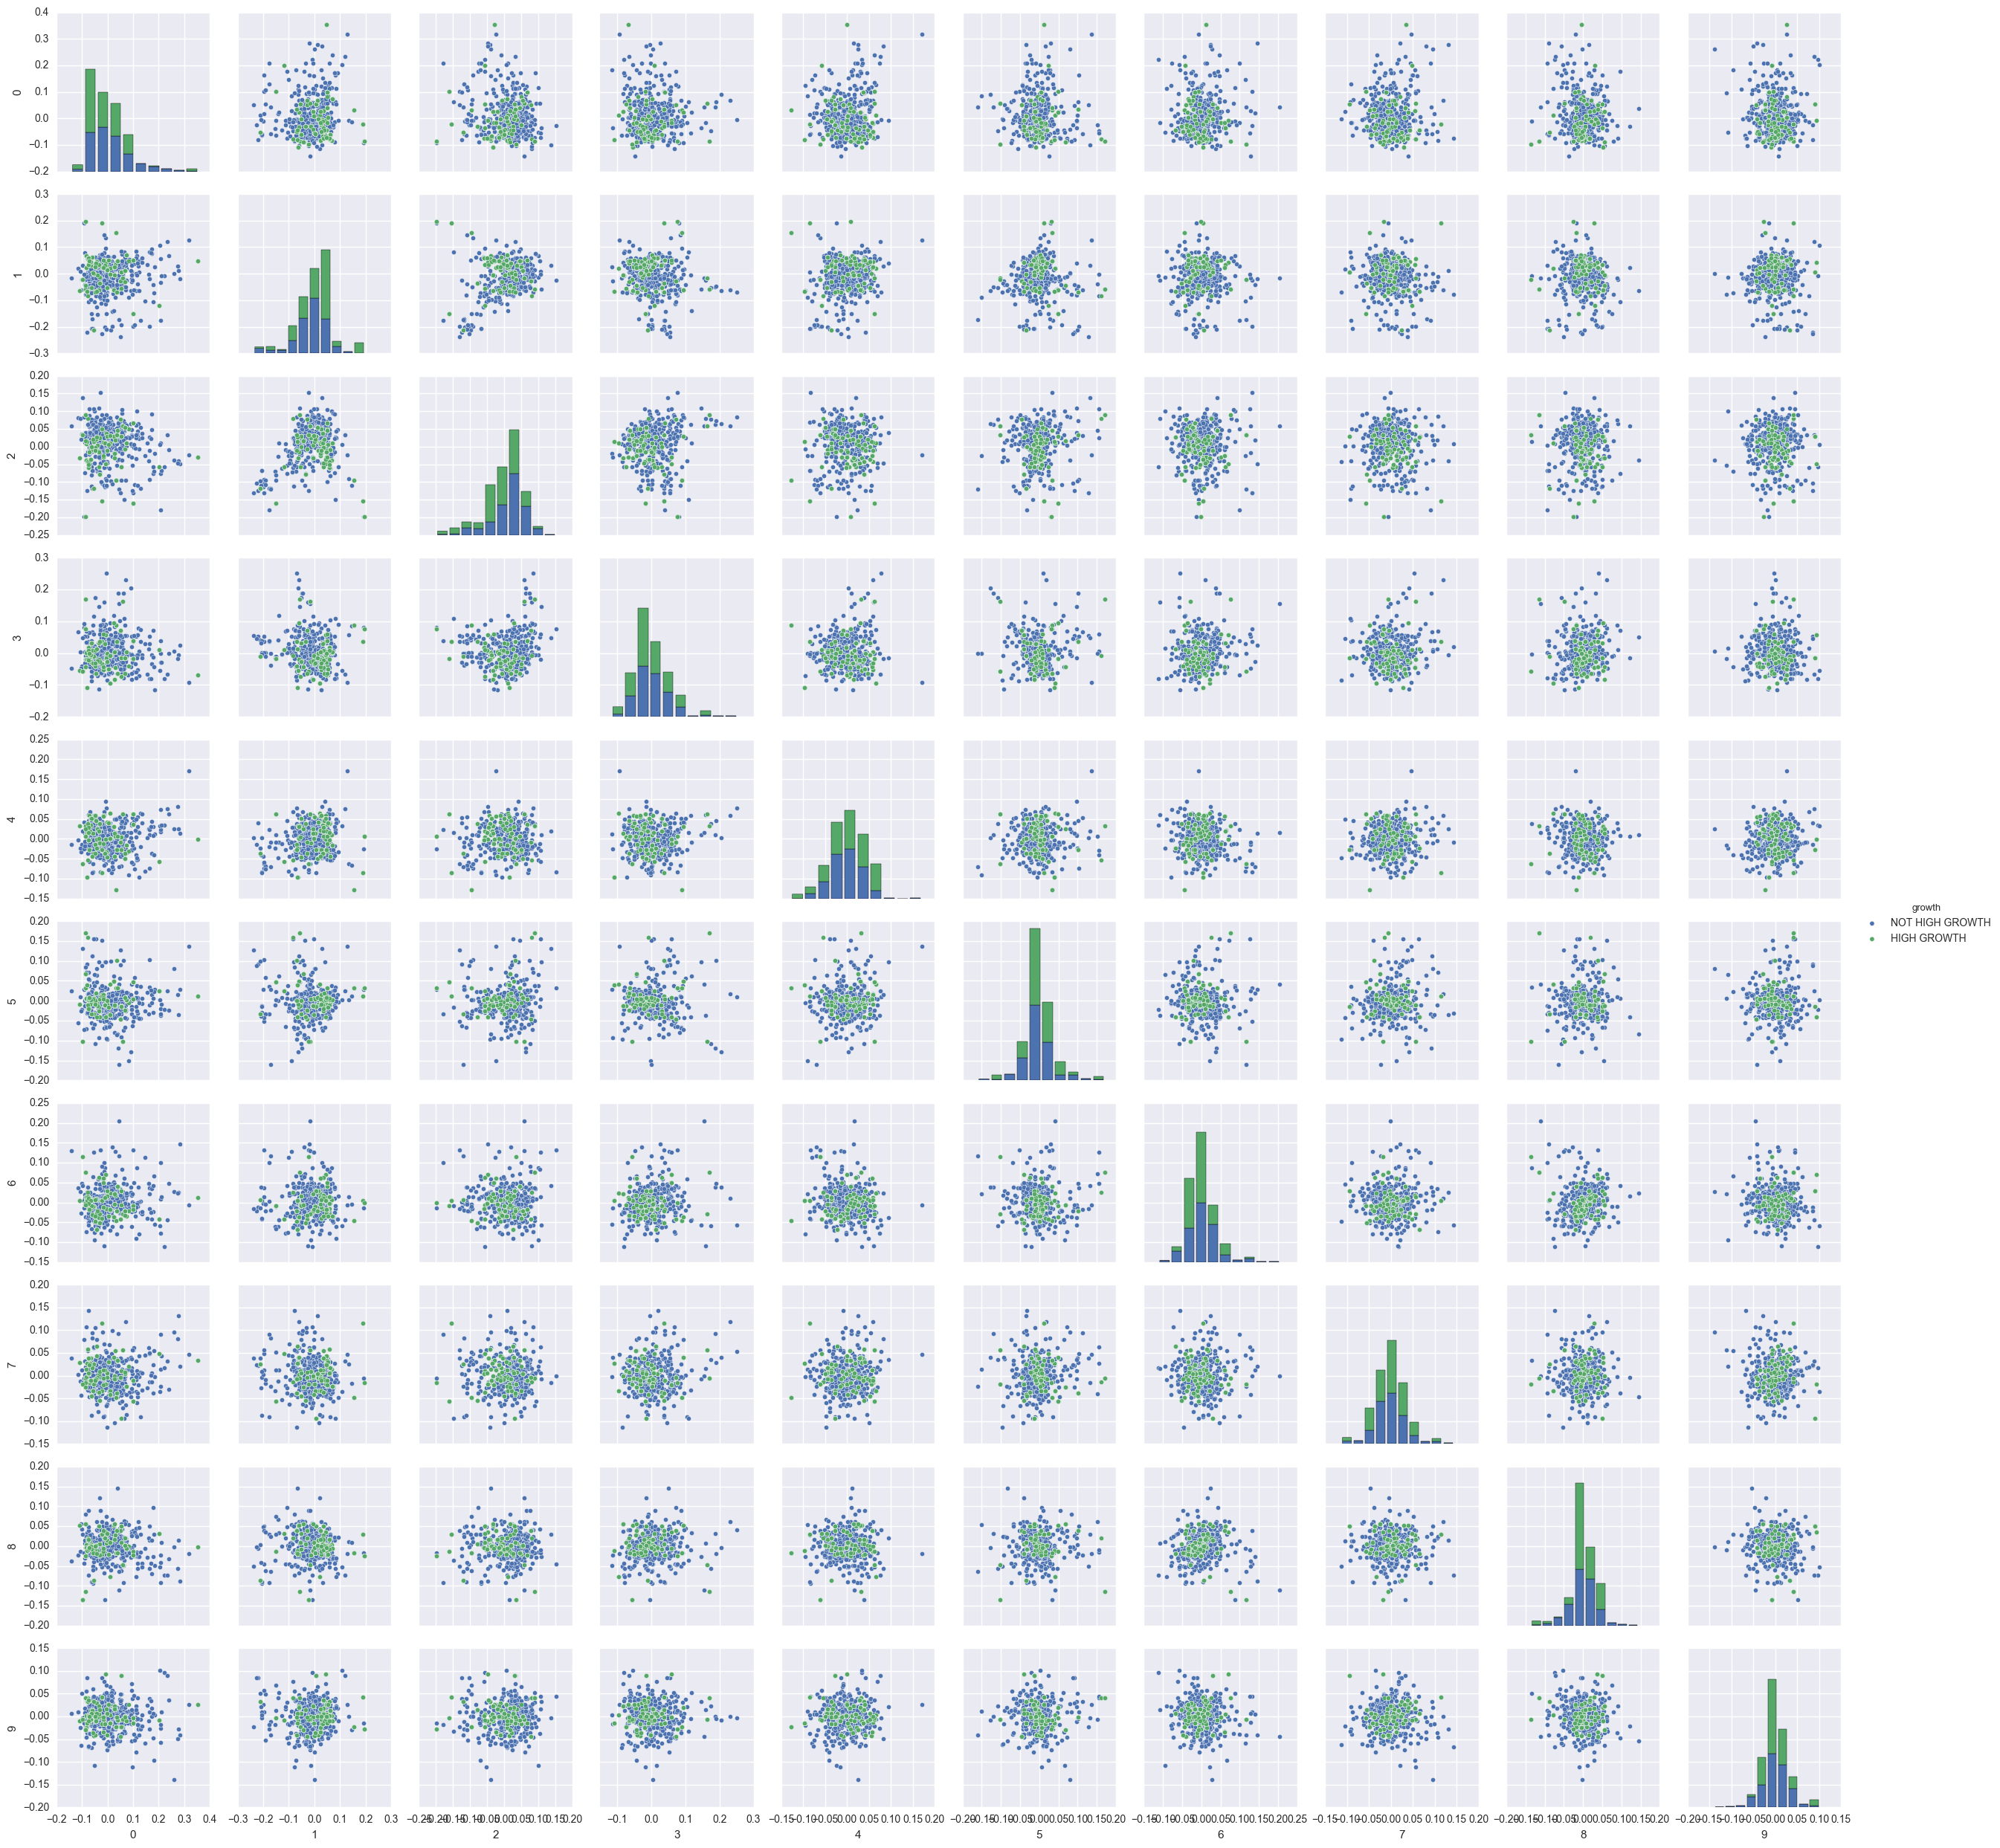

In [457]:
X_kpca_os_scaled = pd.DataFrame(KernelPCA(kernel="rbf", fit_inverse_transform=True, n_components=10).fit_transform(X_train_scaled))
X_kpca_os_scaled['growth'] = y_train_os
sns.pairplot(data=X_kpca_os_scaled, hue = 'growth')
plt.show()